<a href="https://colab.research.google.com/github/ChaitaliKPatil/COVID_Data_Visualization_in_India/blob/main/Project_1_COVID_19_Analysis%2C_Visualizations_India_and_World_2021_09_15_Chaitali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project: COVID-19 Outbreak Analysis

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# Download data
!git clone https://github.com/CSSEGISandData/COVID-19.git

# Install 'geocoder'
!pip install geocoder

# Importing modules
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime 
import geocoder
import folium
from folium import plugins 

Cloning into 'COVID-19'...
remote: Enumerating objects: 195365, done.
remote: Counting objects: 100% (1264/1264), done.
remote: Compressing objects: 100% (823/823), done.
remote: Total 195365 (delta 685), reused 977 (delta 437), pack-reused 194101
Receiving objects: 100% (195365/195365), 1.93 GiB | 25.77 MiB/s, done.
Resolving deltas: 100% (150052/150052), done.
Checking out files: 100% (1352/1352), done.
  Using cached geocoder-1.38.1-py2.py3-none-any.whl (98 kB)


In [5]:
# DataFrame for the world
conf_csv = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
conf_df = pd.read_csv(conf_csv)
grouped_conf_df = conf_df.groupby(by = ['Country/Region'], as_index = False).sum()

# DataFrame for India
india_df = pd.read_csv("https://api.covid19india.org/csv/latest/state_wise.csv")
india_df = india_df.iloc[1:36, :]
state_latitudes = []
state_longitudes = []
for i in india_df.index:
    state = india_df['State'][i]
    state_lat = geocoder.osm(state).lat
    state_lng = geocoder.osm(state).lng
    state_latitudes.append(state_lat)
    state_longitudes.append(state_lng)

state_latitudes = pd.Series(data = state_latitudes, index = india_df.index)
state_longitudes = pd.Series(data = state_longitudes, index = india_df.index)
india_df['Latitude'] = state_latitudes
india_df['Longitude'] = state_longitudes

# state_coordinates = [(19.7515, 75.7139), # Maharashtra
#                     (11.1271, 78.6569), # Tamil Nadu
#                     (15.9129, 79.7400), # Andhra Pradesh
#                     (15.317, 75.7139), # Karnataka
#                     (28.7041, 77.1025), # Delhi
#                     (26.8467, 80.9462), # UP
#                     (22.9868, 87.8550), # WB
#                     (25.0961, 85.3131), # Bihar
#                     (18.1124, 79.0193), # Telangana
#                     (22.2587, 71.1924), # Gujarat
#                     (26.2006, 92.9376), # Assam
#                     (27.0238, 74.2179), # Rajasthan
#                     (20.9517, 85.0985), # Odisha
#                     (29.0588, 76.0856), # Haryana
#                     (22.9734, 78.6569), # Madhya Pradesh
#                     (10.8505, 76.2711), # Kerala
#                     (31.1471, 75.3412), # Punjab
#                     (33.7782, 76.5762), # Jammu and Kashmir
#                     (23.6102, 85.2799), # Jharkhand
#                     (21.2787, 81.8661), # Chattisgarh
#                     (30.0668, 79.0193), # Uttarakhand
#                     (15.2993, 74.1240), # Goa
#                     (23.9408, 91.9882), # Tripura
#                     (11.9416, 79.8083), # Puducherry
#                     (24.6637, 93.9063), # Manipur
#                     (31.1048, 77.1734), # Himachal Pradesh
#                     (26.1584, 94.5624), # Nagaland
#                     (28.2180, 94.7278), # Arunachal Pradesh
#                     (11.7401, 92.6586), # Andaman and Nicobar
#                     (34.1700, 77.5800), # Ladakh
#                     (30.7333, 76.7794), # Chandigarh
#                     (20.1809, 73.0169), # Dadra and Nagar Haveli
#                     (25.4670, 91.3662), # Meghalaya
#                     (27.5330, 88.5122), # Sikkim
#                     (23.1645, 92.9376), # Mizoram
#                      ]
                  
# ind_state_lat = pd.Series([s[0] for s in state_coordinates], index = india_df.index)
# ind_state_lng = pd.Series([s[1] for s in state_coordinates], index = india_df.index)

# india_df['Latitude'] = ind_state_lat
# india_df['Longitude'] = ind_state_lng

# DataFrame for the US
us_conf_csv = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
us_conf_df = pd.read_csv(us_conf_csv)
us_conf_df = us_conf_df.dropna()
grouped_us_conf_df = us_conf_df.groupby(by = ['Combined_Key'], as_index = False).sum()

# Function to get total confirmed cases in a country
def get_total_confirmed_cases_for_country(country_name):
    total_cases_country = conf_df[conf_df['Country/Region'] == country_name].iloc[:, 4:].apply(sum, axis = 0)
    total_cases_country.index = pd.to_datetime(total_cases_country.index)
    return total_cases_country

# Function to get total confirmed cases in the world
def get_total_confirmed_global_cases():
    global_cases = conf_df.iloc[:, 4:].apply(sum, axis=0)
    global_cases.index = pd.to_datetime(global_cases.index)
    return global_cases

# Function to create a line plot
def line_plot(your_name, plot_background, fig_width, fig_height, country_name, colour, linewidth, markertype):
    dt_series = None
    if country_name != 'global':
        dt_series = get_total_confirmed_cases_for_country(country_name)
    else:
        dt_series = get_total_confirmed_global_cases()
    plt.style.use(plot_background)
    plt.figure(figsize = (fig_width, fig_height))
    plt.title(f'{country_name.upper()}: Total Coronavirus Cases Reported\nCreated by {your_name.upper()}\n2021, IIT Indore', fontsize = 16)
    plt.plot(dt_series.index, dt_series, c = colour, lw = linewidth, marker = markertype, markersize = 7)
    plt.xticks(rotation = 45)
    plt.ylabel("Total Cases")
    plt.grid(linestyle='--', c='grey')
    plt.show()

# Adding minimap
def add_minimap(map_name):
    # Plugin for mini map
    minimap = plugins.MiniMap(toggle_display = True)
    map_name.add_child(minimap) # Adding minimap
    plugins.ScrollZoomToggler().add_to(map_name) # Adding scroll zoom toggler to map
    plugins.Fullscreen(position='topright').add_to(map_name) # Adding full screen button to map

# Adding title to map
def add_title(map_name, country, your_name):
    title_html = '''
        <h2 align="center" style="font-size:20px"><b>Coronavirus Total Confirmed Cases in {}</b></h2>
        <h4 align="center" style="font-size:16px"><i>Created by</i> {}</h4>
        <h4 align="center" style="font-size:16px"><i>2021, IIT Indore</i>
            <a href=""></a>
        </h4>
             '''.format(country, your_name.upper())   
    return map_name.get_root().html.add_child(folium.Element(title_html))

# Function to create folium maps using for India, US and the world
def folium_map_with_circles(your_name, country, map_width, map_height, left_margin, top_margin, map_tile, zoom, circle_color, minimap):
    last_col = conf_df.columns[-1]
    if country == 'India':
        india_map = folium.Map(location = [22.3511148, 78.6677428], 
                               width = map_width, height = map_height,
                               left = f"{left_margin}%", top = f"{top_margin}%",
                               tiles = map_tile, zoom_start = zoom)
        
        if minimap == True:
            add_minimap(india_map)
    
        add_title(india_map, country, your_name)    
        for i in india_df.index:
            folium.Circle(radius = float(india_df.loc[i, 'Confirmed']) / 25,
                          location = [india_df.loc[i, 'Latitude'], india_df.loc[i, 'Longitude']],
                          popup = "{}\n {}\n on {}".format(india_df.loc[i, 'State'], 
                                                          india_df.loc[i, 'Confirmed'], 
                                                          india_df.loc[i, 'Last_Updated_Time']),
                          
                          color = circle_color,
                          fill = True).add_to(india_map)
        return india_map

    elif country == 'US':
        us_map = folium.Map(location = [39.381266, -97.922211], 
                            width = map_width, height = map_height, 
                            left = f"{left_margin}%", top = f"{top_margin}%",
                            tiles = map_tile, zoom_start = zoom)
        if minimap == True:
            add_minimap(us_map)
        
        add_title(us_map, country, your_name)
        for i in grouped_us_conf_df.index:
            folium.Circle(location = [grouped_us_conf_df.loc[i, 'Lat'], grouped_us_conf_df.loc[i, 'Long_']], 
                          radius = int(grouped_us_conf_df.loc[i, last_col]) / 25, 
                          popup = "{}\n {}\n on {}".format(grouped_us_conf_df.loc[i, 'Combined_Key'],
                                                          grouped_us_conf_df.loc[i, last_col],
                                                          last_col),
                          color = circle_color,
                          fill = True).add_to(us_map)
        return us_map
    
    elif country == 'World':
        world_map = folium.Map(location = [0, 0], 
                            width = map_width, height = map_height, 
                            left = f"{left_margin}%", top = f"{top_margin}%",
                            tiles = map_tile, zoom_start = zoom)
        if minimap == True:
            add_minimap(world_map)
        
        add_title(world_map, country, your_name)
        for i in grouped_conf_df.index:
            folium.Circle(location = [grouped_conf_df.loc[i, 'Lat'], grouped_conf_df.loc[i, 'Long']], 
                          radius = int(grouped_conf_df.loc[i, last_col]) / 50, 
                          popup = "{}\n {}\n on {}".format(grouped_conf_df.loc[i, 'Country/Region'],
                                                          grouped_conf_df.loc[i, last_col], 
                                                          last_col),
                          color = circle_color, 
                          fill = True).add_to(world_map)
        return world_map
    else:
        print("\nWrong input! Enter either India, US or World.\n")

# Total confirmed cases in the descending order.
grouped_conf_df = conf_df.groupby(by='Country/Region', as_index=False).sum()
desc_grp_conf_df = grouped_conf_df.sort_values(by=conf_df.columns[-1], ascending=False)

# Function to create a bar plot displaying the top 10 countries having the most number of coronavirus confirmed cases.
def bar_plot(your_name, num_countries, width, height):
    last_col = conf_df.columns[-1]
    latest_date = datetime.datetime.strptime(last_col, '%m/%d/%y').strftime('%B %d, %Y') # Modify the latest date in the 'Month DD, YYYY' format.
    plt.figure(figsize = (width, height))
    plt.title(f'Top {num_countries} Countries with Highest COVID-19 Confirmed Cases\nCreated by {your_name.upper()}\n2021, IIT Indore', 
              fontsize = 16)
    sns.barplot(desc_grp_conf_df[last_col].head(num_countries), desc_grp_conf_df['Country/Region'].head(num_countries), orient = 'h')
    plt.xlabel(f'Total Confirmed Cases (in millions) as of {latest_date}')
    plt.show()

# Non-cumulative Confirmed Cases.
non_cum_conf_df = desc_grp_conf_df.iloc[:, :4]
for i in range(len(desc_grp_conf_df.columns[3:]) - 1):
    series = desc_grp_conf_df[desc_grp_conf_df.columns[3 + (i + 1) ]] - desc_grp_conf_df[desc_grp_conf_df.columns[3 + i]]
    non_cum_conf_df[desc_grp_conf_df.columns[3 + (i + 1)]] = series

# Function to get the total non-cumulative confirmed cases in a country.
def get_total_daily_confirmed_cases_for_country(country_name):
    total_daily_cases = non_cum_conf_df[non_cum_conf_df['Country/Region'] == country_name].iloc[:, 4:].apply(sum, axis = 0)
    total_daily_cases.index = pd.to_datetime(total_daily_cases.index)
    return total_daily_cases

# Line plot for the daily (non-cumulative) confirmed cases in various countries.
def daily_cases_line_plot(your_name, num_countries, width, height):
    plt.figure(figsize=(width, height))
    plt.title(f'Non-Cumulative COVID-19 Confirmed Cases\nCreated by {your_name.upper()}\n2021, IIT Indore', fontsize = 16)
    for region in non_cum_conf_df.iloc[:num_countries, :]['Country/Region']:
        total_conf_cases = get_total_daily_confirmed_cases_for_country(region)
        plt.plot(total_conf_cases.index[53:], total_conf_cases[53:], lw=2.5, label=region)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid('major', linestyle='--', c='grey')
    plt.show()

In [6]:
#creating a line plot to visualise the total number of confirmed cases in India till yesterday. 
#For the line plot, the dataset that we have on coronavirus is maintained at Johns Hopkins University ,
#which gets according to the US time. Hence, we have data updated till yesterday.
conf_df[conf_df['Country/Region'] == 'India']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21,8/12/21,8/13/21,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21,9/9/21,9/10/21,9/11/21,9/12/21,9/13/21,9/14/21
147,NaN,India,20.593684,78.96288,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,31895385,31934455,31969954,31998158,32036511,32077706,32117826,32156493,32192576,32225513,32250679,32285857,32322258,32358829,32393286,32424234,32449306,32474773,32512366,32558530,32603188,32649947,32695030,32737939,32768880,32810845,32857937,32903289,32945907,32988673,33027621,33058843,33096718,33139981,33174954,33208330,33236921,33264175,33289579,33316755


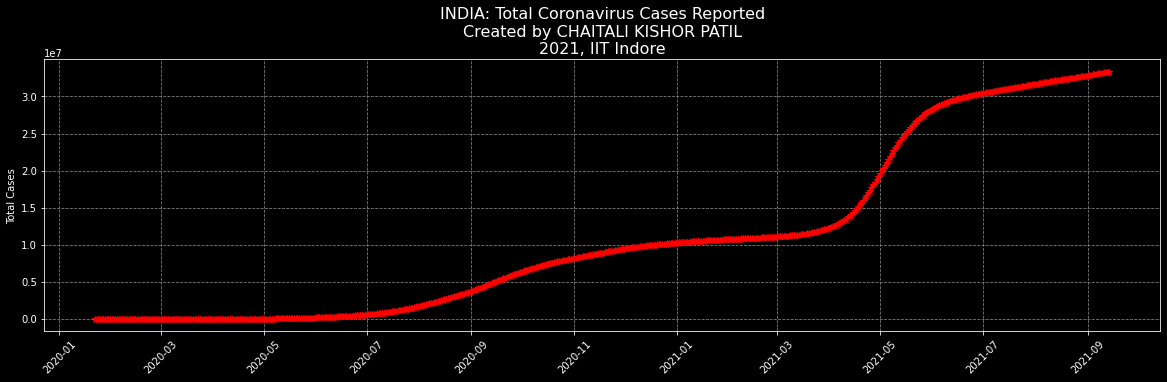

In [7]:
# Creating a line plot for the total confirmed cases in India using the 'line_plot()' function.
line_plot('Chaitali Kishor Patil','dark_background',20,5,'India','red',2,'*')

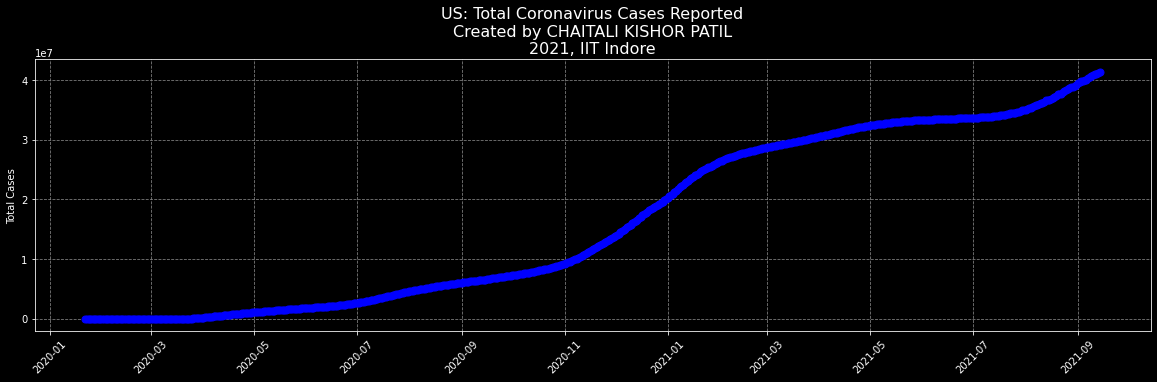

In [8]:
# Creating a line plot for the total confirmed cases in US using the 'line_plot()' function.
line_plot('Chaitali Kishor Patil','dark_background',20,5,'US','blue',2,'o')

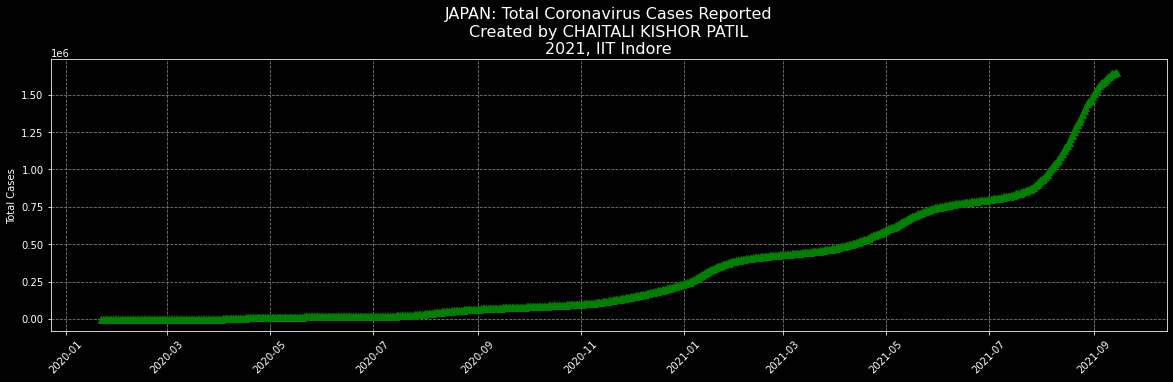

In [9]:
# Creating a line plot for the total confirmed cases in Japan using the 'line_plot()' function.
line_plot('Chaitali Kishor Patil','dark_background',20,5,'Japan','green',2,'^')

In [10]:
india_df

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes,Latitude,Longitude
1,Andaman and Nicobar Islands,7592,7448,129,15,13/08/2021 23:27:22,0,AN,0,0,0,NaN,12.611239,92.831654
2,Andhra Pradesh,2033419,2004786,14030,14603,13/08/2021 23:27:22,0,AP,1445,1243,11,NaN,15.924091,80.186381
3,Arunachal Pradesh,53943,53127,271,545,13/08/2021 23:27:22,0,AR,71,54,0,[July 25]: All numbers corresponding to Papum ...,28.093770,94.592133
4,Assam,596606,585435,5775,4049,13/08/2021 23:27:22,1347,AS,444,706,8,[Jan 1]: 1347 cases i.e Covid +'tive patients ...,26.407384,93.255130
5,Bihar,725852,716128,9658,65,13/08/2021 23:27:22,1,BR,7,15,0,[June 9] : 3951 deceased cases have been repor...,25.644085,85.906508
6,Chandigarh,65164,64317,818,29,13/08/2021 23:27:22,0,CH,2,1,0,NaN,30.733442,76.779714
7,Chhattisgarh,1004957,991048,13559,350,13/08/2021 23:27:22,0,CT,20,41,0,NaN,21.663736,81.840635
8,Dadra and Nagar Haveli and Daman and Diu,10673,10633,4,5,13/08/2021 23:27:22,31,DN,0,0,0,NaN,20.718175,70.932383
9,Delhi,1438345,1412858,25083,404,13/08/2021 23:27:22,0,DL,57,53,0,[July 14]: Value for the total tests conducted...,28.651718,77.221939
10,Goa,175088,171099,3289,700,13/08/2021 23:27:22,0,GA,88,35,70,NaN,15.350319,74.101782


In [11]:
# List the first five rows of the dataset containing the total number of confirmed cases in India. 
india_df.head(5)
#default value is 5

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes,Latitude,Longitude
1,Andaman and Nicobar Islands,7592,7448,129,15,13/08/2021 23:27:22,0,AN,0,0,0,NaN,12.611239,92.831654
2,Andhra Pradesh,2033419,2004786,14030,14603,13/08/2021 23:27:22,0,AP,1445,1243,11,NaN,15.924091,80.186381
3,Arunachal Pradesh,53943,53127,271,545,13/08/2021 23:27:22,0,AR,71,54,0,[July 25]: All numbers corresponding to Papum ...,28.093770,94.592133
4,Assam,596606,585435,5775,4049,13/08/2021 23:27:22,1347,AS,444,706,8,[Jan 1]: 1347 cases i.e Covid +'tive patients ...,26.407384,93.255130
5,Bihar,725852,716128,9658,65,13/08/2021 23:27:22,1,BR,7,15,0,[June 9] : 3951 deceased cases have been repor...,25.644085,85.906508


In [12]:
# List the last five rows of the dataset containing the total number of confirmed cases in India. 
india_df.tail(5)
#default value is 5

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes,Latitude,Longitude
31,State Unassigned,0,0,0,0,13/08/2021 23:27:22,0,UN,0,0,0,MoHFW website reports that these are the 'case...,59.305913,-3.005036
32,Tamil Nadu,2638668,2586786,35246,16636,13/08/2021 23:27:22,0,TN,1658,1542,29,[June 29 2021]: TN has introduced a new distri...,10.909433,78.366535
33,Telangana,662526,653302,3899,5325,13/08/2021 23:27:22,0,TG,324,280,1,[July 27] : Telangana bulletin for the previou...,17.849592,79.115166
34,Tripura,83712,82407,803,439,13/08/2021 23:27:22,63,TR,43,88,1,[Aug 4]: Tripura bulletin for the previous day...,23.775082,91.702509
35,Uttar Pradesh,1709605,1686538,22885,182,13/08/2021 23:27:22,0,UP,18,16,1,[Jan 1]:As no bulletin was provided for 31'st ...,27.130334,80.859666


Using the latitude and longitude values (which are numeric values with decimal), we can create circular markers on a map. For this, use the `folium_map_with_circles()` function which takes the following inputs:

- Name of the person creating the map - a text value enclosed within single-quotes (`''`) or double-quotes (`""`).

- Name of the country - a text value enclosed within single-quotes (`''`) or double-quotes (`""`). Here for this map only three values are supported:

  1. `'India'`

  2. `'US'`

  3. `'World'`

- Width of the map (numeric value).

- Height of the map (numeric value).

- Left margin for the map (numeric value).

- Top margin for the map (numeric value).

- The background style of the map - a text value enclosed within single-quotes (`''`) or double-quotes (`""`). 
Background styles:

  1. `'OpenStreetMap'`

  2. `'Stamen Terrain'`

  3. `'Stamen Toner'`

- Initial zoom in value (a numeric value)

- Colour of the circles on the map -a text value, most commonly used colours:

  1. `'red'`
  
  2. `'blue'` 
  
  3. `'magenta'`

  4. `'yellow'`

  5. `'green'`

- a minimap or not; `True` for **yes** and `False` for **no**.


In [13]:
# Creating a map for World to show the country-wise total confirmed cases of coronavirus.
folium_map_with_circles('Chaitali Kishor Patil','World',1200,500,5,2,'Stamen Terrain',2,'blue',True)

In [14]:
# Exporting the world map as an HTML file. 
world_map=folium_map_with_circles('Chaitali Kishor Patil','World',1200,500,5,2,'Stamen Terrain',2,'blue',True)
world_map.save('/content/World-COVID-19_map_index.html')

In [15]:
# Creating a map for India to show the state-wise total confirmed cases of coronavirus.
folium_map_with_circles('Chaitali Kishor Patil','India',1200,500,5,2,'Stamen Terrain',4.5,'red',True)

The `folium_map_with_circles()` function is a user-defined function

exporting the above map as an HTML file. use the `save()` function-a standard Python function. The input to this function should be a path (or location) of the directory where you want to store the HTML file. Also, name the file as `index.html`. This is very important.

In [16]:
# Exporting the world map as an HTML file. 
india_map=folium_map_with_circles('Chaitali Kishor Patil','India',1200,500,5,2,'Stamen Terrain',4.5,'red',True)
india_map.save('/content/India-COVID-19_map_index.html')